# Natural Language Processing

The dataset contains over __450,000__ vehicles and only 26 atributes that have to be processed.

This document will apply NLP for feature extraction of the description of each car model.

Techniques include _1. TF-IDF_ and _2. Word Embedding_

I followed the following method: https://medium.com/@eiki1212/feature-extraction-in-natural-language-processing-with-python-59c7cdcaf064

## Prepare data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import numpy as np
import CleaningCars as hf

In [2]:
def load_data():    
    csv_path = os.path.join('data', 'vehicles.csv')
    return pd.read_csv(csv_path)

df = load_data()

In [3]:
df.shape

(458213, 26)

# HELPER FUNCTIONS

### Removing unecesarry columns

In [4]:
df = hf.remove_columns(df)

In [5]:
df.columns

Index(['url', 'region', 'price', 'year', 'manufacturer', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

### Price Range

In [6]:
df = hf.price_range(df, 1, sampling = True)

In [7]:
df.shape

(36717, 19)

In [8]:
sum(df["price"] > 60000)

0

### Check for empty values

In [9]:
df["description"].isnull().sum()

12

Only 4 empty values so lets get rid of them

In [10]:
df = df.dropna(subset = ["description"])

In [11]:
df.shape

(36705, 19)

Max and min car price

(array([270., 143., 220., 133., 223.,  71.,  76.,  95.,  53., 170.,  28.,
         90.,  69.,  46., 210.,  42.,  65., 110.,  76., 302.,  37.,  94.,
         83.,  73., 374.,  48.,  93., 165., 134., 512.,  21., 122., 106.,
         60., 469.,  72.,  72., 159., 175., 599.,  19., 124.,  93.,  70.,
        444.,  63.,  66., 116., 184., 541., 215.,  23., 113.,  42., 216.,
        313.,  57.,  85., 112., 783., 140.,  30., 105.,  64., 215., 307.,
         33.,  63., 107., 824., 128.,  23.,  83.,  34., 219., 271.,  33.,
         51.,  88., 746., 114.,   8.,  57.,  34., 157., 234.,  30.,  75.,
         78., 727.,  76.,  12.,  45.,  27., 122., 215.,  36.,  64.,  87.,
        736.]),
 array([1.00000e+00, 1.00980e+02, 2.00960e+02, 3.00940e+02, 4.00920e+02,
        5.00900e+02, 6.00880e+02, 7.00860e+02, 8.00840e+02, 9.00820e+02,
        1.00080e+03, 1.10078e+03, 1.20076e+03, 1.30074e+03, 1.40072e+03,
        1.50070e+03, 1.60068e+03, 1.70066e+03, 1.80064e+03, 1.90062e+03,
        2.00060e+03, 2.100

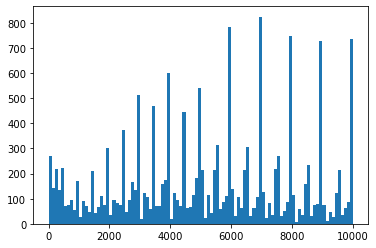

In [12]:
#plot_price = df["price"].loc[df["price"] < 100_000]

plt.hist(df["price"].loc[df["price"] < 10000].values, bins = 100)

(array([1060.,  512.,  542.,  665., 1326.,  850., 1148.,  852., 1161.,
        1659.,  738., 1211.,  683., 1031., 1355.,  431., 1033.,  403.,
         839., 1051.,  371.,  805.,  406.,  744., 1135.,  273.,  745.,
         313.,  622.,  850.,  239.,  562.,  199.,  642.,  528.,  119.,
         452.,  165.,  421.,  565.,   94.,  479.,  115.,  387.,  464.,
         140.,  463.,  152.,  382.,  503.,   97.,  251.,   99.,  354.,
         324.,   88.,  289.,   56.,  345.,  251.,   51.,  258.,   72.,
         163.,  218.,   91.,  321.,   47.,  104.,  143.,   57.,  121.,
          23.,   97.,   81.,   32.,   56.,   19.,   79.,   48.,   19.,
          63.,   17.,   95.,   18.,   15.,   35.,    9.,   46.,   39.,
           7.,   50.,    8.,   29.,   25.,    8.,   22.,    9.,   18.,
          53.]),
 array([1.000000e+00, 6.009800e+02, 1.200960e+03, 1.800940e+03,
        2.400920e+03, 3.000900e+03, 3.600880e+03, 4.200860e+03,
        4.800840e+03, 5.400820e+03, 6.000800e+03, 6.600780e+03,
        7.

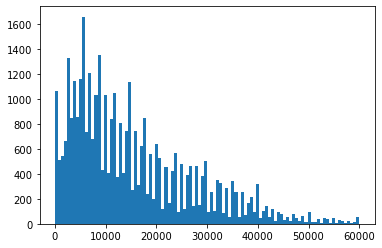

In [13]:
#plot_price = df["price"].loc[df["price"] < 100_000]

plt.hist(df["price"].values, bins = 100)

## 1. TF-IDF

Serves as a way to extract features based off of the importance of words

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer(stop_words='english',max_features = 100)

In [16]:
sentences  = df["description"].values

In [17]:
vectorizer.fit(sentences)

TfidfVectorizer(max_features=100, stop_words='english')

In [18]:
len(vectorizer.vocabulary_)

100

In [19]:
vectorizer.vocabulary_

{'stock': 82,
 'make': 61,
 'model': 64,
 'mileage': 62,
 'fuel': 47,
 'engine': 41,
 'v6': 94,
 'transmission': 91,
 'drive': 38,
 '4wd': 10,
 'body': 18,
 'suv': 83,
 'color': 29,
 'interior': 55,
 'www': 99,
 'auto': 12,
 'sales': 75,
 'clean': 28,
 'title': 87,
 'vehicles': 96,
 'car': 21,
 'vehicle': 95,
 'safety': 73,
 'great': 50,
 'financing': 45,
 'credit': 33,
 '2012': 3,
 'ford': 46,
 '150': 0,
 'time': 86,
 'check': 26,
 'rear': 72,
 'seats': 77,
 'seat': 76,
 'air': 11,
 'control': 32,
 'leather': 57,
 'steering': 81,
 'wheel': 97,
 'power': 69,
 'driver': 39,
 'windows': 98,
 'heated': 51,
 'passenger': 67,
 'automatic': 13,
 'today': 88,
 'new': 65,
 'truck': 92,
 'available': 14,
 'used': 93,
 'exterior': 42,
 'black': 16,
 'pre': 70,
 'price': 71,
 'finance': 44,
 'trade': 90,
 'bad': 15,
 'fees': 43,
 'miles': 63,
 'sale': 74,
 '2016': 7,
 'door': 37,
 'sport': 80,
 'test': 84,
 'text': 85,
 'link': 59,
 'com': 30,
 'low': 60,
 'information': 54,
 'pickup': 68,
 'cars

In [20]:
# Transform to document-term matrix
vector_spaces = vectorizer.transform(sentences)


In [21]:
tfidf = vector_spaces.toarray()

In [33]:
tfidf.shape

(36705, 100)

In [35]:
df.shape

(36705, 19)

In [39]:
df = pd.concat([df, pd.DataFrame(tfidf)], axis = 1)

In [40]:
df.shape

(70513, 119)

In [22]:
from sklearn.linear_model import lasso_path

In [23]:
alphas_lasso, coefs_lasso, _ = lasso_path(tfidf, df["price"], fit_intercept=False)

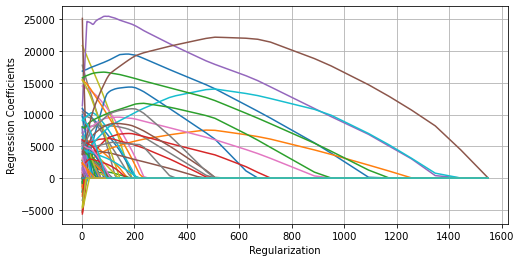

In [24]:
fig, ax = plt.subplots(figsize = (8,4))
for i in range(100):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
    ax.grid(True)
    ax.set_xlabel("Regularization")
    ax.set_ylabel("Regression Coefficients")

In [25]:
clf = linear_model.Lasso(alpha=50)

In [26]:
clf.fit(tfidf, df["price"])

Lasso(alpha=50)

In [27]:
mean_squared_error(df["price"], clf.predict(tfidf))

98587454.9606684

In [28]:
sum(clf.coef_ != 0)

31

In [29]:
np.where(clf.coef_ == 0)[0]

array([ 2,  3,  4,  5,  9, 11, 12, 13, 14, 15, 18, 19, 21, 22, 23, 25, 26,
       28, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48,
       52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 64, 66, 67, 69, 70, 71, 73,
       74, 75, 76, 79, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 94, 96, 98,
       99], dtype=int64)

In [30]:
#most important words by tfidf
iwords = np.asarray(list(vectorizer.vocabulary_))

In [31]:
iwords[np.where(clf.coef_ == 0)[0]]

array(['model', 'mileage', 'fuel', 'engine', '4wd', 'suv', 'color',
       'interior', 'www', 'auto', 'title', 'vehicles', 'vehicle',
       'safety', 'great', 'credit', '2012', '150', 'seats', 'seat', 'air',
       'control', 'leather', 'steering', 'wheel', 'power', 'driver',
       'windows', 'heated', 'passenger', 'automatic', 'today', 'truck',
       'available', 'pre', 'price', 'finance', 'trade', 'bad', 'fees',
       'miles', '2016', 'door', 'sport', 'text', 'com', 'low', 'pickup',
       'cars', 'inventory', 'series', 'dual', '2017', '2015', 'sedan',
       'gasoline', 'carfax', 'number', 'good', '2011', 'carvana',
       'contact', 'carvanaauto', 'dealership', 'cab', 'chevrolet', '4dr',
       'bmw', 'il'], dtype='<U12')